In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
df.shape

(119390, 32)

In [7]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [17]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [18]:
df=df.drop(columns=['arrival_date_year','agent','company','reservation_status_date',])
df.shape
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [19]:
duplicate_rows_df=df[df.duplicated()]
print("Number of duplicate rows:",duplicate_rows_df.shape)

Number of duplicate rows: (32267, 28)


In [20]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
days_in_waiting_list              119390
customer_type                     119390
adr             

In [24]:
df=df.drop_duplicates()
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [23]:
df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123
adr                               87123


In [27]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87119.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000
mean,0.272879,79.729601,26.836266,15.815376,1.005441,2.625495,1.875842,0.138879,0.010835,0.039186,0.030233,0.184567,0.272270,0.731885,106.366713,0.084490,0.699907
std,0.445442,85.941448,13.674562,8.835234,1.031579,2.051753,0.626833,0.456248,0.113674,0.194038,0.369369,1.734574,0.727994,9.866000,55.044371,0.281934,0.832228
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


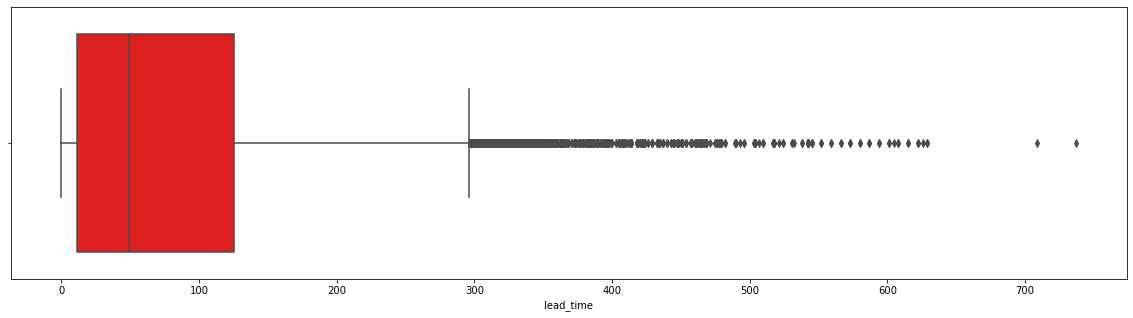

In [37]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['lead_time'],color='red')
plt.show()